In [52]:
from keras.datasets import mnist
from keras.models import Sequential
from keras.utils.np_utils import to_categorical
from keras.layers import Dense, Normalization, Conv2D, MaxPooling2D, Flatten
from keras import regularizers
from sklearn.metrics import confusion_matrix, classification_report
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import Adam
import matplotlib.pyplot as plt
import seaborn as sn
import numpy as np

In [53]:
dataset = mnist.load_data('mnist.db')

In [54]:
train, test = dataset

In [55]:
Xtrain, Ytrain = train
len(Xtrain)
print(Ytrain)
Ytrain = to_categorical(Ytrain)
print(Ytrain[:,0])

[5 0 4 ... 5 6 8]
[0. 1. 0. ... 0. 0. 0.]


In [56]:
Xtest, Ytest = test
len(Xtest)

10000

In [57]:
print(Xtrain.shape)
channels = 1
Xtrain = Xtrain.reshape((Xtrain.shape[0], Xtrain.shape[1], Xtrain.shape[2], channels))
Xtest = Xtest.reshape((Xtest.shape[0], Xtest.shape[1], Xtest.shape[2], channels))

(60000, 28, 28)


In [65]:
model = Sequential([
    Conv2D(filters=6,kernel_size=(5,5),padding='valid',activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D(2,2),
    Conv2D(16,(5,5),activation='relu',padding='valid'),
    MaxPooling2D(2,2),
    Flatten(),
    Dense(units=120,activation='relu',input_shape=(784,),kernel_regularizer = regularizers.L2(1e-6)),
    Dense(units=84,activation='relu',input_shape=(784,),kernel_regularizer = regularizers.L2(1e-6)),
    #Dense(units=256,activation='relu',kernel_regularizer = regularizers.L2(1e-6)),
    #Dense(units=128,activation='relu',kernel_regularizer = regularizers.L2(1e-6)),
    Dense(units=10,activation='softmax',kernel_regularizer = regularizers.L2(1e-6)),
                   ])
model.compile(loss='categorical_crossentropy',optimizer = Adam(),metrics=['accuracy'])

In [66]:
history = model.fit(Xtrain,Ytrain,epochs=10,batch_size=32,validation_split=0.2)

Epoch 1/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.3549 - accuracy: 0.9141 - val_loss: 0.1052 - val_accuracy: 0.9677
Epoch 2/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0940 - accuracy: 0.9715 - val_loss: 0.0817 - val_accuracy: 0.9741
Epoch 3/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0721 - accuracy: 0.9782 - val_loss: 0.0807 - val_accuracy: 0.9764
Epoch 4/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0619 - accuracy: 0.9813 - val_loss: 0.0706 - val_accuracy: 0.9803
Epoch 5/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0509 - accuracy: 0.9847 - val_loss: 0.0813 - val_accuracy: 0.9796
Epoch 6/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0476 - accuracy: 0.9854 - val_loss: 0.0781 - val_accuracy: 0.9820
Epoch 7/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0413 - accuracy: 0.9876 - val_loss: 0.0685 - val_accuracy:

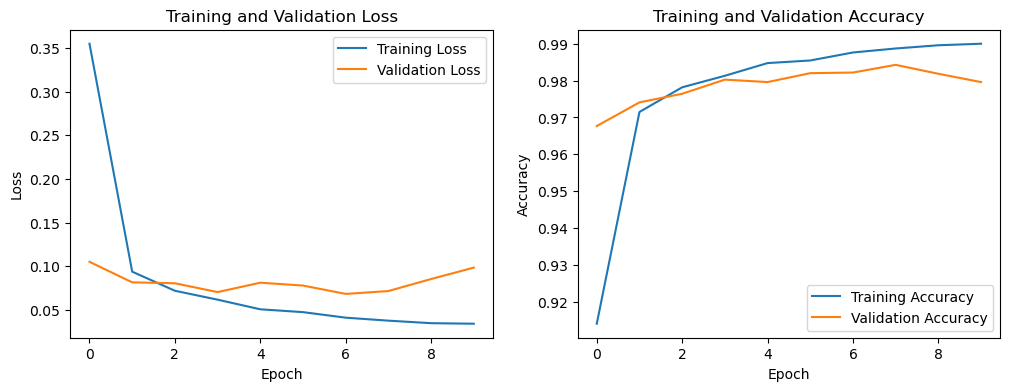

In [67]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')

plt.show()


313/313 [==============================] - 1s 1ms/step


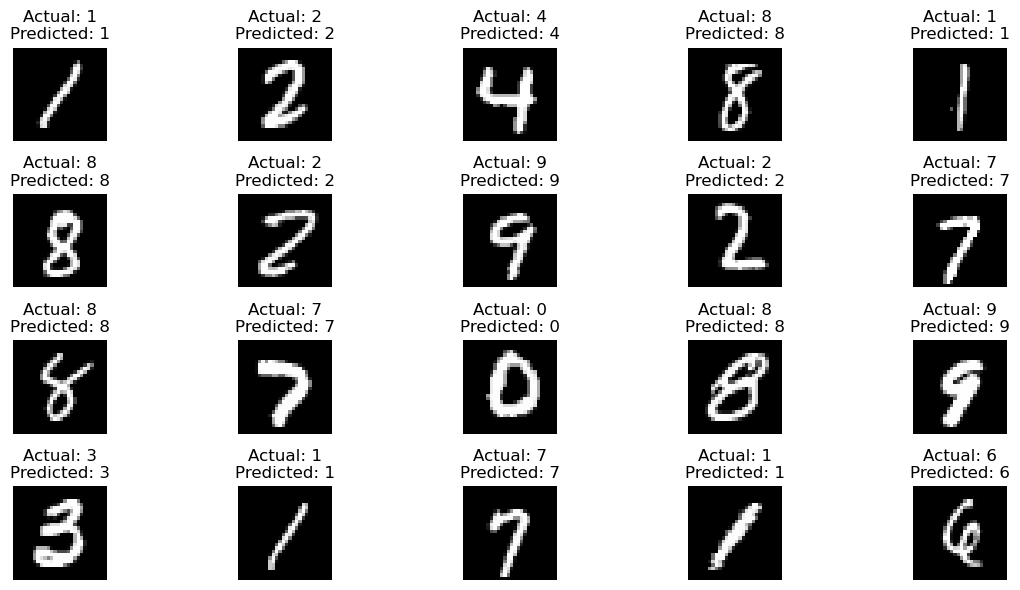

In [68]:
predictions = model.predict(Xtest)
predicted_labels = np.argmax(predictions, axis=1)


num_samples_to_display = 20
sample_indices = np.random.choice(len(Xtest), num_samples_to_display, replace=False)

# Create a figure to display the comparison
plt.figure(figsize=(12, 6))

for i, sample_index in enumerate(sample_indices):
    plt.subplot(4, 5, i + 1)
    plt.imshow(Xtest[sample_index], cmap='gray')
    plt.title(f"Actual: {Ytest[sample_index]}\nPredicted: {predicted_labels[sample_index]}")
    plt.axis('off')

plt.tight_layout()
plt.show()

313/313 [==============================] - 0s 1ms/step
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.99      0.98       980
           1       0.97      0.99      0.98      1135
           2       1.00      0.97      0.98      1032
           3       0.98      0.98      0.98      1010
           4       0.98      0.98      0.98       982
           5       0.99      0.96      0.97       892
           6       0.96      0.99      0.97       958
           7       0.98      0.97      0.98      1028
           8       0.98      0.98      0.98       974
           9       0.98      0.97      0.97      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



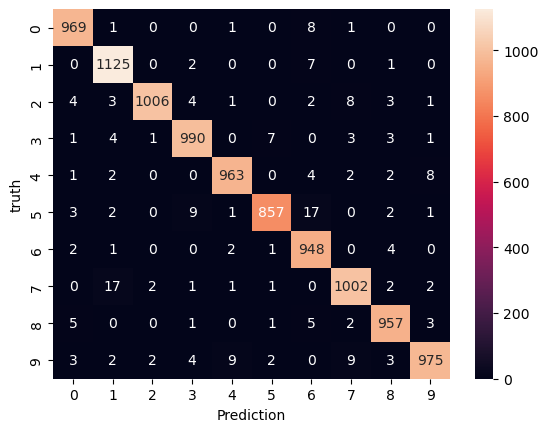

In [69]:
Ypred = model.predict(Xtest)
Ypred_labels = np.argmax(Ypred, axis=1)
confusion = confusion_matrix(Ytest, Ypred_labels)
classification_report_str = classification_report(Ytest, Ypred_labels)

sn.heatmap(confusion,annot=True,fmt='d')
plt.xlabel('Prediction')
plt.ylabel('truth')

print("Classification Report:\n", classification_report_str)